In [3]:
#importing relev. libs
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt   # data visualization

#importing data
df = pd.read_csv('../data/arganguez_feeder_data.csv',parse_dates=[0])
df.set_index('Timestamp',inplace=True)
df.drop(['Times'],inplace=True,axis=1)
df_proc = df.resample('15T').asfreq().sort_index(ascending=False)

#cleaning data
missing_segments = df_proc[df_proc.isna().any(axis=1)]

# Print the missing segments, if any
if len(missing_segments) > 0:
    df_proc = df_proc.interpolate('linear')
    print("\n{} segments corrected:".format(len(missing_segments)))
else:
    print("No missing segments.")

#Splitting load into subsequences


1 segments corrected:


# Creating Subsequences

In [5]:
#setting up containers to store data
jan_wk1,jan_wk2,jan_wk3,jan_wk4 = [],[],[],[]
feb_wk1,feb_wk2,feb_wk3,feb_wk4 = [],[],[],[]

In [6]:
#Creating subsequences of each week and storing the days as elements of the list
for i in range(0,7):
    start = '2016-01-04 00:00:00'
    jan_wk1.append(df_proc[str(pd.to_datetime(start) + pd.Timedelta(days=i)):str(pd.to_datetime(start) + pd.Timedelta(days=(i+1)))])
    jan_wk2.append(df_proc[ str(pd.to_datetime(start) + pd.Timedelta(weeks=1, days=i)):str(pd.to_datetime(start) + pd.Timedelta(weeks=1, days=(i+1))) ])
    jan_wk3.append(df_proc[ str(pd.to_datetime(start) + pd.Timedelta(weeks=2, days=i)):str(pd.to_datetime(start) + pd.Timedelta(weeks=2, days=(i+1))) ])
    jan_wk4.append(df_proc[ str(pd.to_datetime(start) + pd.Timedelta(weeks=3, days=i)):str(pd.to_datetime(start) + pd.Timedelta(weeks=3, days=(i+1))) ])
    start='2016-02-01 00:00:00'
    feb_wk1.append(df_proc[str(pd.to_datetime(start) + pd.Timedelta(days=i)):str(pd.to_datetime(start) + pd.Timedelta(days=(i+1)))])
    feb_wk2.append(df_proc[ str(pd.to_datetime(start) + pd.Timedelta(weeks=1, days=i)):str(pd.to_datetime(start) + pd.Timedelta(weeks=1, days=(i+1))) ])
    feb_wk3.append(df_proc[ str(pd.to_datetime(start) + pd.Timedelta(weeks=2, days=i)):str(pd.to_datetime(start) + pd.Timedelta(weeks=2, days=(i+1))) ])

start='2016-02-01 00:00:00'
end = '2016-02-25 08:45:00'
feb_wk4.append(df_proc[ str(pd.to_datetime(start) + pd.Timedelta(weeks=3, days=0)):str(pd.to_datetime(start) + pd.Timedelta(weeks=3, days=1)) ])
feb_wk4.append(df_proc[ str(pd.to_datetime(start) + pd.Timedelta(weeks=3, days=1)):str(pd.to_datetime(start) + pd.Timedelta(weeks=3, days=2)) ])
feb_wk4.append(df_proc[ str(pd.to_datetime(start) + pd.Timedelta(weeks=3, days=2)):str(pd.to_datetime(start) + pd.Timedelta(weeks=3, days=3)) ])
feb_wk4.append(df_proc[ str(pd.to_datetime(start) + pd.Timedelta(weeks=3, days=3)):end ])

In [7]:
#dropping overlaps of the 0th hour from the preceding day then reversing the order to ascending to become chronological.
jan_wk1 = list(map(lambda x:x.drop(index=x.index[0], axis=0).iloc[::-1]['P total_SJN'], jan_wk1)) 
jan_wk2 = list(map(lambda x:x.drop(index=x.index[0], axis=0).iloc[::-1]['P total_SJN'], jan_wk2)) 
jan_wk3 = list(map(lambda x:x.drop(index=x.index[0], axis=0).iloc[::-1]['P total_SJN'], jan_wk3)) 
jan_wk4 = list(map(lambda x:x.drop(index=x.index[0], axis=0).iloc[::-1]['P total_SJN'], jan_wk4)) 
feb_wk1 = list(map(lambda x:x.drop(index=x.index[0], axis=0).iloc[::-1]['P total_SJN'], feb_wk1)) 
feb_wk2 = list(map(lambda x:x.drop(index=x.index[0], axis=0).iloc[::-1]['P total_SJN'], feb_wk2)) 
feb_wk3 = list(map(lambda x:x.drop(index=x.index[0], axis=0).iloc[::-1]['P total_SJN'], feb_wk3)) 
feb_wk4 = list(map(lambda x:x.drop(index=x.index[0], axis=0).iloc[::-1]['P total_SJN'], feb_wk4)) 

In [8]:
#checking if subsequences were sliced correctly
subseq_check = np.array([jan_wk1[0].index[0].weekday() == 0,
jan_wk1[6].index[0].weekday() == 6,
jan_wk2[0].index[0].weekday() == 0,
jan_wk2[6].index[0].weekday() == 6,
jan_wk3[0].index[0].weekday() == 0,
jan_wk3[6].index[0].weekday() == 6,
jan_wk4[0].index[0].weekday() == 0,
jan_wk4[6].index[0].weekday() == 6,
feb_wk1[0].index[0].weekday() == 0,
feb_wk1[6].index[0].weekday() == 6,
feb_wk2[0].index[0].weekday() == 0,
feb_wk2[6].index[0].weekday() == 6,
feb_wk3[0].index[0].weekday() == 0,
feb_wk3[6].index[0].weekday() == 6])
np.all(subseq_check)

True

In [11]:
#Grouping like weekdays into sequences to compare their visual fits and euclidean distances.

mon1 = jan_wk1[0].to_frame().reset_index().rename(columns={'P total_SJN':'JMON-1:P_TOTAL_SJN'}).drop('Timestamp',axis=1)
mon2 = jan_wk2[0].to_frame().reset_index().rename(columns={'P total_SJN':'JMON-2:P_TOTAL_SJN'}).drop('Timestamp',axis=1)
mon3 = jan_wk3[0].to_frame().reset_index().rename(columns={'P total_SJN':'JMON-3:P_TOTAL_SJN'}).drop('Timestamp',axis=1)
mon4 = jan_wk4[0].to_frame().reset_index().rename(columns={'P total_SJN':'JMON-4:P_TOTAL_SJN'}).drop('Timestamp',axis=1)
jan_mondays = pd.concat([mon1,mon2,mon3,mon4],axis=1)

tue1 = jan_wk1[1].to_frame().reset_index().rename(columns={'P total_SJN':'JTUE-1:P_TOTAL_SJN'}).drop('Timestamp',axis=1)
tue2 = jan_wk2[1].to_frame().reset_index().rename(columns={'P total_SJN':'JTUE-2:P_TOTAL_SJN'}).drop('Timestamp',axis=1)
tue3 = jan_wk3[1].to_frame().reset_index().rename(columns={'P total_SJN':'JTUE-3:P_TOTAL_SJN'}).drop('Timestamp',axis=1)
tue4 = jan_wk4[1].to_frame().reset_index().rename(columns={'P total_SJN':'JTUE-4:P_TOTAL_SJN'}).drop('Timestamp',axis=1)
jan_tuesdays = pd.concat([tue1,tue2,tue3,tue4],axis=1)

wed1 = jan_wk1[2].to_frame().reset_index().rename(columns={'P total_SJN':'JWED-1:P_TOTAL_SJN'}).drop('Timestamp',axis=1)
wed2 = jan_wk2[2].to_frame().reset_index().rename(columns={'P total_SJN':'JWED-2:P_TOTAL_SJN'}).drop('Timestamp',axis=1)
wed3 = jan_wk3[2].to_frame().reset_index().rename(columns={'P total_SJN':'JWED-3:P_TOTAL_SJN'}).drop('Timestamp',axis=1)
wed4 = jan_wk4[2].to_frame().reset_index().rename(columns={'P total_SJN':'JWED-4:P_TOTAL_SJN'}).drop('Timestamp',axis=1)
jan_wednesdays = pd.concat([wed1,wed2,wed3,wed4],axis=1)

thu1 = jan_wk1[3].to_frame().reset_index().rename(columns={'P total_SJN':'JTHU-1:P_TOTAL_SJN'}).drop('Timestamp',axis=1)
thu2 = jan_wk2[3].to_frame().reset_index().rename(columns={'P total_SJN':'JTHU-2:P_TOTAL_SJN'}).drop('Timestamp',axis=1)
thu3 = jan_wk3[3].to_frame().reset_index().rename(columns={'P total_SJN':'JTHU-3:P_TOTAL_SJN'}).drop('Timestamp',axis=1)
thu4 = jan_wk4[3].to_frame().reset_index().rename(columns={'P total_SJN':'JTHU-4:P_TOTAL_SJN'}).drop('Timestamp',axis=1)
jan_thursdays = pd.concat([thu1,thu2,thu3,thu4],axis=1)

fri1 = jan_wk1[4].to_frame().reset_index().rename(columns={'P total_SJN':'JFRI-1:P_TOTAL_SJN'}).drop('Timestamp',axis=1)
fri2 = jan_wk2[4].to_frame().reset_index().rename(columns={'P total_SJN':'JFRI-2:P_TOTAL_SJN'}).drop('Timestamp',axis=1)
fri3 = jan_wk3[4].to_frame().reset_index().rename(columns={'P total_SJN':'JFRI-3:P_TOTAL_SJN'}).drop('Timestamp',axis=1)
fri4 = jan_wk4[4].to_frame().reset_index().rename(columns={'P total_SJN':'JFRI-4:P_TOTAL_SJN'}).drop('Timestamp',axis=1)
jan_fridays = pd.concat([fri1,fri2,fri3,fri4],axis=1)

sat1 = jan_wk1[5].to_frame().reset_index().rename(columns={'P total_SJN':'JSAT-1:P_TOTAL_SJN'}).drop('Timestamp',axis=1)
sat2 = jan_wk2[5].to_frame().reset_index().rename(columns={'P total_SJN':'JSAT-2:P_TOTAL_SJN'}).drop('Timestamp',axis=1)
sat3 = jan_wk3[5].to_frame().reset_index().rename(columns={'P total_SJN':'JSAT-3:P_TOTAL_SJN'}).drop('Timestamp',axis=1)
sat4 = jan_wk4[5].to_frame().reset_index().rename(columns={'P total_SJN':'JSAT-4:P_TOTAL_SJN'}).drop('Timestamp',axis=1)
jan_saturdays = pd.concat([sat1,sat2,sat3,sat4],axis=1)

sun1 = jan_wk1[6].to_frame().reset_index().rename(columns={'P total_SJN':'JSUN-1:P_TOTAL_SJN'}).drop('Timestamp',axis=1)
sun2 = jan_wk2[6].to_frame().reset_index().rename(columns={'P total_SJN':'JSUN-2:P_TOTAL_SJN'}).drop('Timestamp',axis=1)
sun3 = jan_wk3[6].to_frame().reset_index().rename(columns={'P total_SJN':'JSUN-3:P_TOTAL_SJN'}).drop('Timestamp',axis=1)
sun4 = jan_wk4[6].to_frame().reset_index().rename(columns={'P total_SJN':'JSUN-4:P_TOTAL_SJN'}).drop('Timestamp',axis=1)
jan_sundays = pd.concat([sun1,sun2,sun3,sun4],axis=1)
#pd.merge(m1,m2,m3,m4,on='index')

In [18]:
#changing x-axis to reflect time
jan_mondays.set_index(pd.date_range(start='00:00', end='23:45', freq='15min').time, inplace=True)
jan_tuesdays.set_index(pd.date_range(start='00:00', end='23:45', freq='15min').time, inplace=True)
jan_wednesdays.set_index(pd.date_range(start='00:00', end='23:45', freq='15min').time, inplace=True)
jan_thursdays.set_index(pd.date_range(start='00:00', end='23:45', freq='15min').time, inplace=True)
jan_fridays.set_index(pd.date_range(start='00:00', end='23:45', freq='15min').time, inplace=True)
jan_saturdays.set_index(pd.date_range(start='00:00', end='23:45', freq='15min').time, inplace=True)
jan_sundays.set_index(pd.date_range(start='00:00', end='23:45', freq='15min').time, inplace=True)

The extreme changes in load are not part of the general pattern and hence they will be changed via interpolation

# Assessing Simililarity in Load Data

## Visual Inspection


### Testing how similar the weekdays are to themselves over the January and February Period

<AxesSubplot: xlabel='time'>

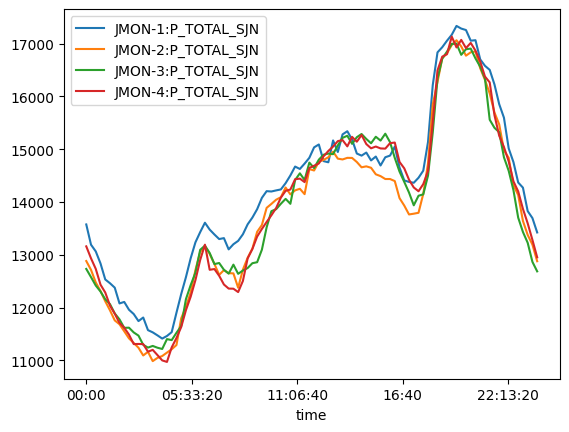

In [19]:
#reducing extreme values
jan_mondays.plot()

<AxesSubplot: xlabel='time'>

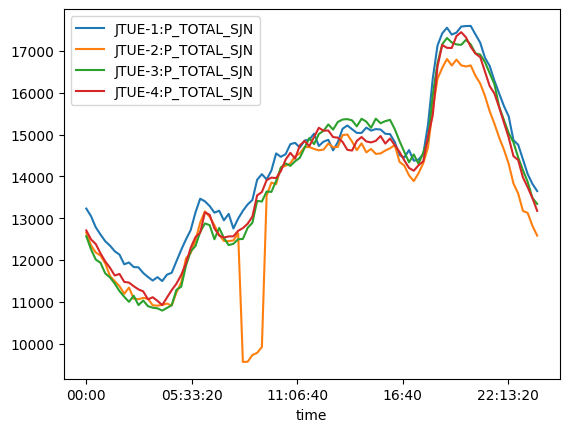

In [20]:
jan_tuesdays.plot()

<AxesSubplot: xlabel='time'>

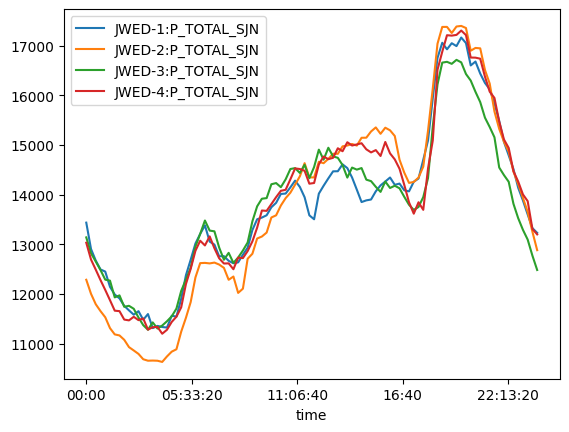

In [21]:
jan_wednesdays.plot()

<AxesSubplot: xlabel='time'>

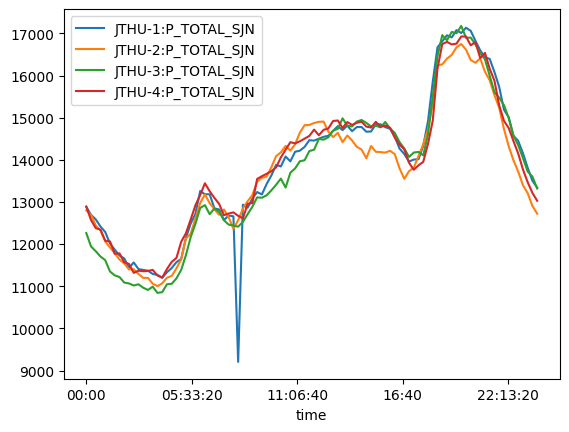

In [22]:
jan_thursdays.plot()

<AxesSubplot: xlabel='time'>

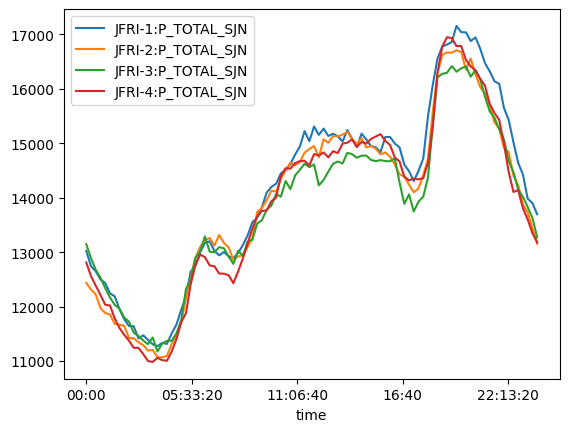

In [23]:
jan_fridays.plot()

<AxesSubplot: xlabel='time'>

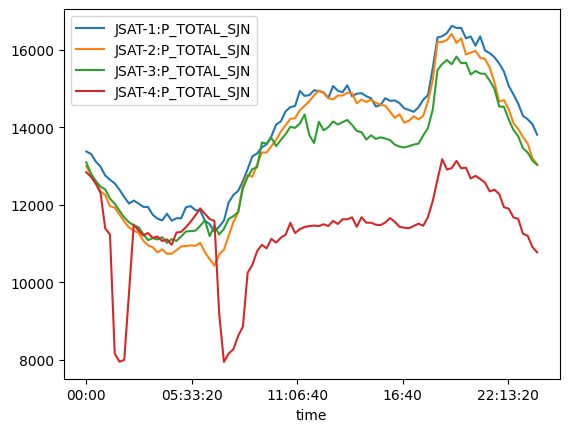

In [24]:
jan_saturdays.plot()

<AxesSubplot: xlabel='time'>

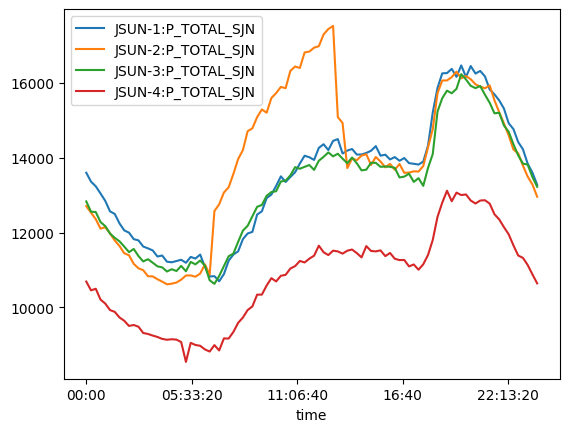

In [25]:
jan_sundays.plot()

## Matrix Profile

The matrix profile is used to calculate how similar the shape of the time series is throughout the data. It ignores the effect of amplitude on similarity due to normalization of the data. Time series motifs are approximately repeated subsequences found within a longer time series. There should be a global motif and then other k-motifs. 

In [28]:
import stumpy
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as dates
from matplotlib.patches import Rectangle
import datetime as dt

plt.style.use('https://raw.githubusercontent.com/TDAmeritrade/stumpy/main/docs/stumpy.mplstyle')

In [29]:
df_proc

,S total_SJN,P total_SJN,Q total_SJN,pf total_SJN
Timestamp,,,,
2016-02-25 08:45:00,12681.963,12242.791,3308.515,0.965
2016-02-25 08:30:00,12220.026,11800.326,3175.114,0.966
2016-02-25 08:15:00,12211.772,11787.791,3189.885,0.965
2016-02-25 08:00:00,11806.309,11435.935,2933.994,0.969
2016-02-25 07:45:00,11728.820,11377.988,2847.211,0.970
...,...,...,...,...
2016-01-01 01:00:00,13961.358,13551.752,3357.015,0.971
2016-01-01 00:45:00,14039.635,13630.260,3365.615,0.971
2016-01-01 00:30:00,14160.296,13751.502,3377.893,0.971


In [33]:
m = (15*4*23)+45
mp = stumpy.stump(df_proc['P total_SJN'], m)
motif_idx = np.argsort(mp[:, 0])[0]
print(f"The motif is located at index {motif_idx}")


The motif is located at index 2666


In [34]:
nearest_neighbor_idx = mp[motif_idx, 1]
print(f"The nearest neighbor is located at index {nearest_neighbor_idx}")

The nearest neighbor is located at index 3242


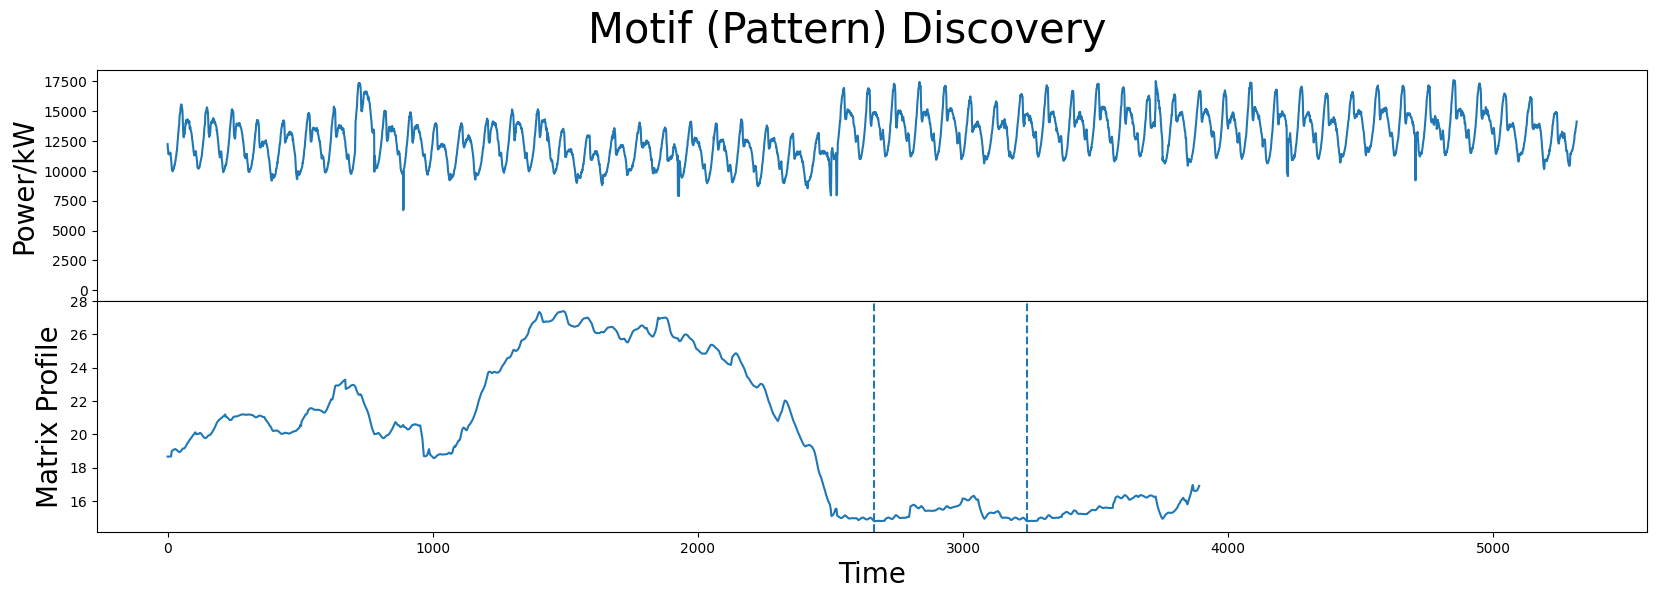

In [35]:
fig, axs = plt.subplots(2, sharex=True, gridspec_kw={'hspace': 0})
plt.suptitle('Motif (Pattern) Discovery', fontsize='30')

axs[0].plot(df_proc['P total_SJN'].values)
axs[0].set_ylabel('Power/kW', fontsize='20')
rect = Rectangle((motif_idx, 0), m, 40, facecolor='lightgrey')
axs[0].add_patch(rect)
rect = Rectangle((nearest_neighbor_idx, 0), m, 40, facecolor='lightgrey')
axs[0].add_patch(rect)
axs[1].set_xlabel('Time', fontsize ='20')
axs[1].set_ylabel('Matrix Profile', fontsize='20')
axs[1].axvline(x=motif_idx, linestyle="dashed")
axs[1].axvline(x=nearest_neighbor_idx, linestyle="dashed")
axs[1].plot(mp[:, 0])
plt.show()

I can't figure out how to find multiple repeats(more than 1 repeat) of the input pattern in the time series data. ChatGPT recommended using stumped. 

## Euclidean Distance

In [42]:
jan_mondays

,JMON-1:P_TOTAL_SJN,JMON-2:P_TOTAL_SJN,JMON-3:P_TOTAL_SJN,JMON-4:P_TOTAL_SJN
00:00:00,13575.423,12882.394,12732.352,13160.015
00:15:00,13191.545,12714.635,12577.430,12933.261
00:30:00,13064.414,12476.851,12417.855,12733.229
00:45:00,12836.590,12314.395,12304.554,12434.646
01:00:00,12532.873,12120.047,12158.334,12285.742
...,...,...,...,...
22:45:00,14370.266,14132.793,13704.106,14201.499
23:00:00,14272.394,13641.333,13432.422,13870.278
23:15:00,13828.362,13377.642,13227.602,13597.086
23:30:00,13695.979,13192.980,12866.073,13281.685


In [52]:
#calculating euclidean distances for each monday to each other
JM12_ED = np.linalg.norm(jan_mondays['JMON-1:P_TOTAL_SJN'] - jan_mondays['JMON-2:P_TOTAL_SJN'])
JM13_ED = np.linalg.norm(jan_mondays['JMON-1:P_TOTAL_SJN'] - jan_mondays['JMON-3:P_TOTAL_SJN'])
JM14_ED = np.linalg.norm(jan_mondays['JMON-1:P_TOTAL_SJN'] - jan_mondays['JMON-4:P_TOTAL_SJN'])

JM21_ED = np.linalg.norm(jan_mondays['JMON-2:P_TOTAL_SJN'] - jan_mondays['JMON-1:P_TOTAL_SJN'])
JM23_ED = np.linalg.norm(jan_mondays['JMON-2:P_TOTAL_SJN'] - jan_mondays['JMON-3:P_TOTAL_SJN'])
JM24_ED = np.linalg.norm(jan_mondays['JMON-2:P_TOTAL_SJN'] - jan_mondays['JMON-4:P_TOTAL_SJN'])

JM31_ED = np.linalg.norm(jan_mondays['JMON-3:P_TOTAL_SJN'] - jan_mondays['JMON-1:P_TOTAL_SJN'])
JM32_ED = np.linalg.norm(jan_mondays['JMON-3:P_TOTAL_SJN'] - jan_mondays['JMON-2:P_TOTAL_SJN'])
JM34_ED = np.linalg.norm(jan_mondays['JMON-3:P_TOTAL_SJN'] - jan_mondays['JMON-4:P_TOTAL_SJN'])

JM41_ED = np.linalg.norm(jan_mondays['JMON-4:P_TOTAL_SJN'] - jan_mondays['JMON-1:P_TOTAL_SJN'])
JM42_ED = np.linalg.norm(jan_mondays['JMON-4:P_TOTAL_SJN'] - jan_mondays['JMON-2:P_TOTAL_SJN'])
JM43_ED = np.linalg.norm(jan_mondays['JMON-4:P_TOTAL_SJN'] - jan_mondays['JMON-3:P_TOTAL_SJN'])



## Calculating Barycenters

For more info on Barycenter, see the <a href="https://tslearn.readthedocs.io/en/stable/auto_examples/clustering/plot_barycenters.html#sphx-glr-auto-examples-clustering-plot-barycenters-py">official tslearn documentation</a>

/home/shankar/miniconda3/envs/gpu_acc/lib/python3.10/site-packages/tslearn/barycenters/dba.py:735: ConvergenceWarning: DBA loss is increasing while it should not be. Stopping optimization.
  warnings.warn("DBA loss is increasing while it should not be. "


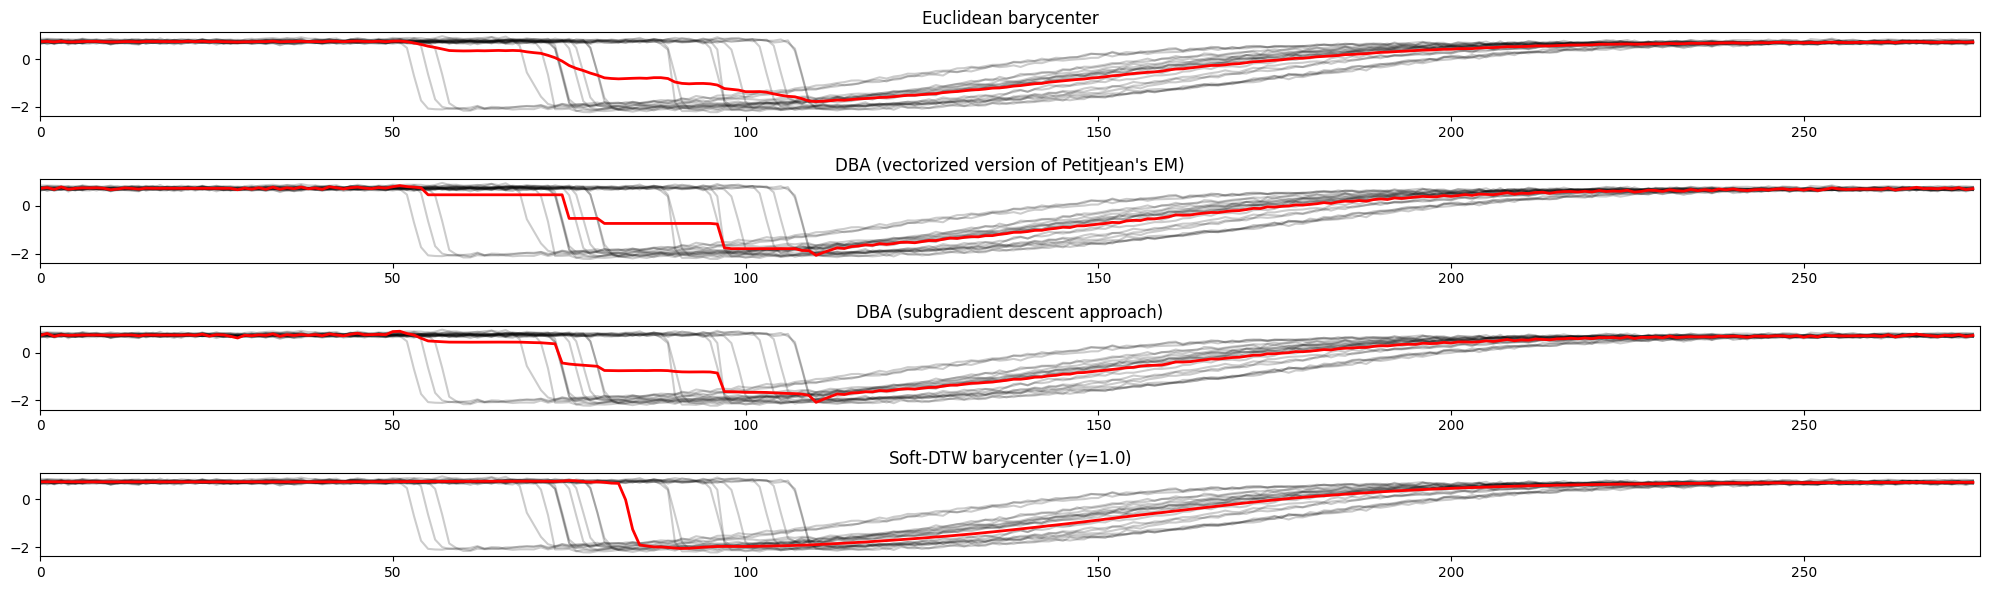

In [51]:
# Author: Romain Tavenard, Felix Divo
# License: BSD 3 clause

#TODO: Mofify code to fit to time series

import numpy
import matplotlib.pyplot as plt

from tslearn.barycenters import \
    euclidean_barycenter, \
    dtw_barycenter_averaging, \
    dtw_barycenter_averaging_subgradient, \
    softdtw_barycenter
from tslearn.datasets import CachedDatasets

# fetch the example data set
numpy.random.seed(0)
X_train, y_train, _, _ = CachedDatasets().load_dataset("Trace")
X = X_train[y_train == 2]
length_of_sequence = X.shape[1]


def plot_helper(barycenter):
    # plot all points of the data set
    for series in X:
        plt.plot(series.ravel(), "k-", alpha=.2)
    # plot the given barycenter of them
    plt.plot(barycenter.ravel(), "r-", linewidth=2)


# plot the four variants with the same number of iterations and a tolerance of
# 1e-3 where applicable
ax1 = plt.subplot(4, 1, 1)
plt.title("Euclidean barycenter")
plot_helper(euclidean_barycenter(X))

plt.subplot(4, 1, 2, sharex=ax1)
plt.title("DBA (vectorized version of Petitjean's EM)")
plot_helper(dtw_barycenter_averaging(X, max_iter=50, tol=1e-3))

plt.subplot(4, 1, 3, sharex=ax1)
plt.title("DBA (subgradient descent approach)")
plot_helper(dtw_barycenter_averaging_subgradient(X, max_iter=50, tol=1e-3))

plt.subplot(4, 1, 4, sharex=ax1)
plt.title("Soft-DTW barycenter ($\gamma$=1.0)")
plot_helper(softdtw_barycenter(X, gamma=1., max_iter=50, tol=1e-3))

# clip the axes for better readability
ax1.set_xlim([0, length_of_sequence])

# show the plot(s)
plt.tight_layout()
plt.show()